In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import numpy as np

In [2]:
training_history = pd.read_pickle('results/checkpoint-best/training_history.pkl')
training_history

TrainerState(epoch=5.0, global_step=37500, max_steps=37500, num_train_epochs=5, total_flos=4.531428232585574e+16, log_history=[{'loss': 0.0187, 'learning_rate': 1.866826666666667e-05, 'epoch': 0.33, 'step': 2500}, {'eval_loss': 0.005186041351407766, 'eval_precision': 0.9785880689998168, 'eval_recall': 0.9786136851473745, 'eval_f1': 0.9786008769059615, 'eval_accuracy': 0.9986532346100907, 'eval_runtime': 57.7748, 'eval_samples_per_second': 86.543, 'eval_steps_per_second': 10.818, 'epoch': 0.33, 'step': 2500}, {'loss': 0.0055, 'learning_rate': 1.7334933333333336e-05, 'epoch': 0.67, 'step': 5000}, {'eval_loss': 0.0036667557433247566, 'eval_precision': 0.9795007050712905, 'eval_recall': 0.9818595885032197, 'eval_f1': 0.980678728299519, 'eval_accuracy': 0.9988668185485785, 'eval_runtime': 57.4715, 'eval_samples_per_second': 87.0, 'eval_steps_per_second': 10.875, 'epoch': 0.67, 'step': 5000}, {'loss': 0.0046, 'learning_rate': 1.6003733333333334e-05, 'epoch': 1.0, 'step': 7500}, {'eval_loss':

In [3]:
training_history.log_history

[{'loss': 0.0187,
  'learning_rate': 1.866826666666667e-05,
  'epoch': 0.33,
  'step': 2500},
 {'eval_loss': 0.005186041351407766,
  'eval_precision': 0.9785880689998168,
  'eval_recall': 0.9786136851473745,
  'eval_f1': 0.9786008769059615,
  'eval_accuracy': 0.9986532346100907,
  'eval_runtime': 57.7748,
  'eval_samples_per_second': 86.543,
  'eval_steps_per_second': 10.818,
  'epoch': 0.33,
  'step': 2500},
 {'loss': 0.0055,
  'learning_rate': 1.7334933333333336e-05,
  'epoch': 0.67,
  'step': 5000},
 {'eval_loss': 0.0036667557433247566,
  'eval_precision': 0.9795007050712905,
  'eval_recall': 0.9818595885032197,
  'eval_f1': 0.980678728299519,
  'eval_accuracy': 0.9988668185485785,
  'eval_runtime': 57.4715,
  'eval_samples_per_second': 87.0,
  'eval_steps_per_second': 10.875,
  'epoch': 0.67,
  'step': 5000},
 {'loss': 0.0046,
  'learning_rate': 1.6003733333333334e-05,
  'epoch': 1.0,
  'step': 7500},
 {'eval_loss': 0.005106177646666765,
  'eval_precision': 0.977784730913642,
  'ev

In [4]:
training_evaluation_overall = []
for i in range(0, len(training_history.log_history)):
    if "eval_f1" in training_history.log_history[i]:
        training_evaluation_overall.append(training_history.log_history[i]['eval_f1'])
    else:
        continue

In [5]:
len(training_evaluation_overall)

15

In [6]:
training_evaluation_langs = {'DE': [0.9783721466451465, 0.9761882872115473, 0.9775497113534317, 0.9837758112094396, 0.9830414746543779, 
                                    0.9848491825926778, 0.9847458408221578, 0.9856873302959178, 0.9858636091541189, 0.9864466162640605, 
                                    0.9879729044744482, 0.9834859009154054, 0.982427086208483, 0.9850402761795166, 0.9884358442755126],
                             'EN': [0.9831772127700248, 0.9840011461865419, 0.9855861015654829, 0.9869683517112988, 0.986272540297508,
                                    0.9901984221850347, 0.9893530675578895, 0.9910202521971724, 0.9911597457829597, 0.9909281894576013,
                                    0.9918800152846771, 0.9899365669862165, 0.990885230255309, 0.9917884082879785, 0.9923583914413985],
                             'ES': [0.9781283614198638, 0.9846467554276119, 0.97672186225102, 0.9879894306990152, 0.9887276651876724,
                                    0.9895583293326933, 0.9890228540579449, 0.9894976894916883, 0.990868677159678, 0.9905150678352743,
                                    0.9906340057636889, 0.9904613354130423, 0.990160787137029, 0.9909996399855995, 0.9912385981757081],
                             'FR': [0.9737428203024265, 0.9784575865491272, 0.9781388823942015, 0.980636883238073, 0.9754141238012206,
                                    0.9839897160219704, 0.9827757342208209, 0.983165770399813, 0.9843887037361867, 0.9838248175182481,
                                    0.9852072735777349, 0.9844589857443328, 0.9856884163794615, 0.985800268801496, 0.9870798012277112]}

In [7]:
steps = list(np.arange(2500,40000, 2500))

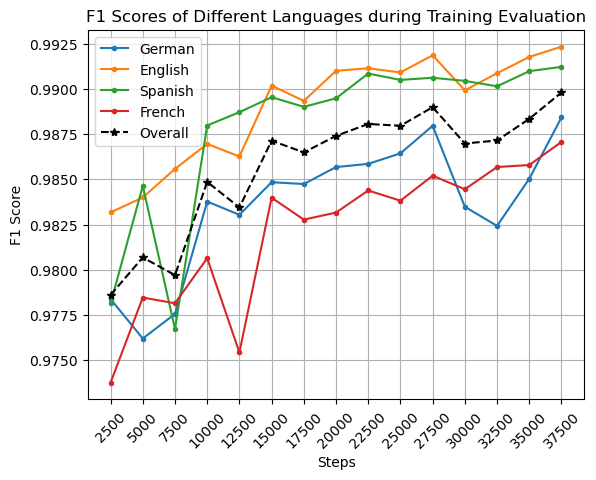

In [8]:
plt.plot(steps, training_evaluation_langs['DE'], '.-', label='German')
plt.plot(steps, training_evaluation_langs['EN'], '.-', label='English')
plt.plot(steps, training_evaluation_langs['ES'], '.-', label='Spanish')
plt.plot(steps, training_evaluation_langs['FR'], '.-', label='French')
plt.plot(steps, training_evaluation_overall, '*--', label='Overall', color = "black")
plt.xticks(steps, rotation = 45)
plt.xlabel("Steps")
plt.ylabel("F1 Score")
plt.legend()
plt.grid()
plt.title("F1 Scores of Different Languages during Training Evaluation")
plt.show()

## Dataset Analysis

In [9]:
df_train_tl = pd.read_hdf('data/marc_multilingual-merged_train_tokenized_labeled.h5', 'df')
df_test_tl = pd.read_hdf('data/marc_multilingual-merged_test_tokenized_labeled.h5', 'df')
df_validation_tl = pd.read_hdf('data/marc_multilingual-merged_validation_tokenized_labeled.h5', 'df')

In [10]:
df_train_tl

,reviews,labels,languages,review_tokens,token_labels,token_languages,unique_language_count
0,"[Carga algo lento., I do like the range of col...","[2, 1, 1, 1, 1, 0, 1, 3, 1, 2, 1, 1, 1, 3, 1, ...","[es, en, en, en, en, de, en, fr, en, es, en, e...","[Carga, algo, lento., I, do, like, the, range,...","[2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[es, es, es, en, en, en, en, en, en, en, en, e...",4
1,[Los imanes son potentes pero el pegamento que...,"[2, 0, 3, 3, 1, 2]","[es, de, fr, fr, en, es]","[Los, imanes, son, potentes, pero, el, pegamen...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[es, es, es, es, es, es, es, es, es, es, es, e...",4
2,"[déçue de mon achat, je m'attendais à mieux !!...","[3, 0, 0, 2, 2, 3, 2, 2, 3, 0, 3, 0, 3, 1]","[fr, de, de, es, es, fr, es, es, fr, de, fr, d...","[déçue, de, mon, achat,, je, m'attendais, à, m...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, ...","[fr, fr, fr, fr, fr, fr, fr, fr, fr, de, de, d...",4
3,[Je suis très déçue car je n’ai pas reçu la bo...,"[3, 0, 1, 1, 2]","[fr, de, en, en, es]","[Je, suis, très, déçue, car, je, n’ai, pas, re...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[fr, fr, fr, fr, fr, fr, fr, fr, fr, fr, fr, f...",4
4,[El diseño de La foto es más llamativo que las...,"[2, 2, 0, 1, 0, 0, 1, 3, 2, 0, 3, 3, 2]","[es, es, de, en, de, de, en, fr, es, de, fr, f...","[El, diseño, de, La, foto, es, más, llamativo,...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[es, es, es, es, es, es, es, es, es, es, es, e...",4
...,...,...,...,...,...,...,...
59995,"[Le tactile fonctionne bien., Die beschriebene...","[3, 0, 2, 1, 3, 2, 1, 2, 0, 0, 3, 0]","[fr, de, es, en, fr, es, en, es, de, de, fr, de]","[Le, tactile, fonctionne, bien., Die, beschrie...","[3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[fr, fr, fr, fr, de, de, de, de, de, de, de, d...",4
59996,"[Very disappointed with this purchase., Had to...","[1, 1, 1, 0, 0, 0, 1, 2, 3, 1]","[en, en, en, de, de, de, en, es, fr, en]","[Very, disappointed, with, this, purchase., Ha...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[en, en, en, en, en, en, en, en, en, en, en, e...",4
59997,[When the battery arrived put in laptop and it...,"[1, 2, 1, 2, 1, 3, 2, 1, 2, 2, 0, 2, 2, 0]","[en, es, en, es, en, fr, es, en, es, es, de, e...","[When, the, battery, arrived, put, in, laptop,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, ...","[en, en, en, en, en, en, en, en, en, en, en, e...",4
59998,"[Al principio no conectaba con los textos., I’...","[2, 1, 1, 3, 3, 0, 2, 2, 2, 2, 1, 1, 2, 3]","[es, en, en, fr, fr, de, es, es, es, es, en, e...","[Al, principio, no, conectaba, con, los, texto...","[2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...","[es, es, es, es, es, es, es, en, en, en, en, e...",4


<Axes: xlabel='unique_language_count', ylabel='count'>

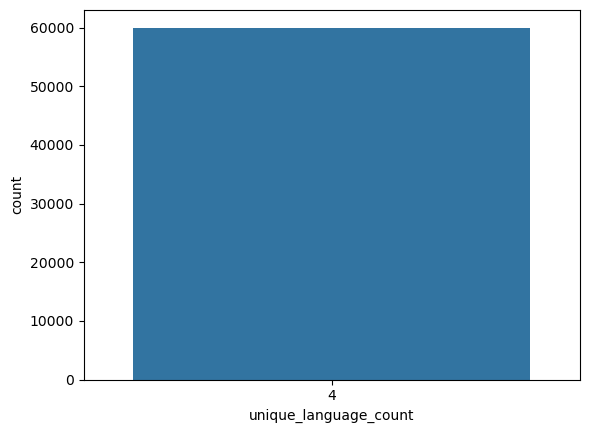

In [11]:
sns.countplot(x=df_train_tl["unique_language_count"])

<Axes: xlabel='unique_language_count', ylabel='count'>

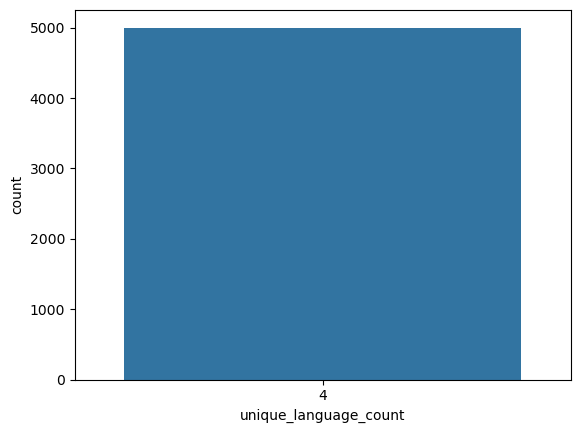

In [12]:
sns.countplot(x=df_test_tl["unique_language_count"])

<Axes: xlabel='unique_language_count', ylabel='count'>

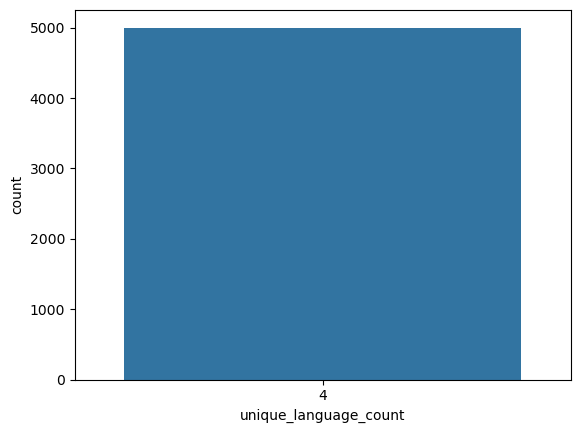

In [13]:
sns.countplot(x=df_validation_tl["unique_language_count"])